In [1]:
# %% autoreload 2
from BandExcitation.File.DataWriter import DataConverter
from BandExcitation.Measurement.BEMeasurement import BEMeasurement
from BandExcitation.File.DataWriter import DataConverter

import matplotlib.pyplot as plt

import numpy as np

In [2]:
beparms = BEMeasurement(spectroscopic_min_voltage=-4, 
                   spectroscopic_max_voltage=4, 
                   BE_rep=2, 
                   BE_time = 4e-3,
                   BE_ampl = 1,
                   AI_sample_rate=2e6, 
                   BE_ppw = 2**13,
                   BE_center_freq = 340e3, 
                   BE_bandwidth = 60e3, 
                   BE_num_bins = 400,
                   AI_photodiode_vertical_range=1,
                   AI_AWG_channel_num=1,
                   BE_smoothing = 125
                  )

Initializing BEparams
0


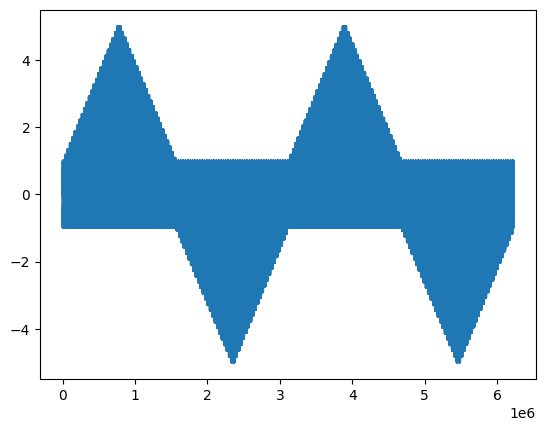

In [3]:
plt.plot(beparms.be_spectroscopy.cantilever_excitation_waveform)

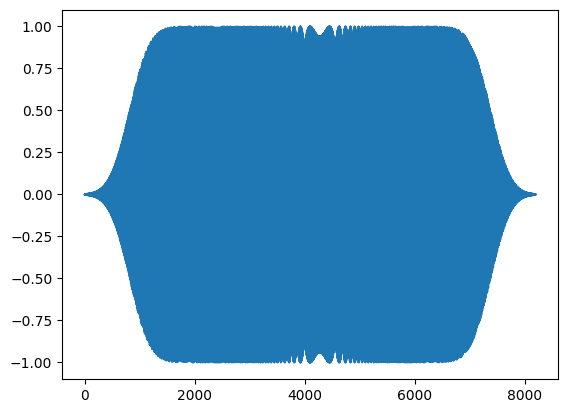

In [5]:
plt.plot(beparms.be_spectroscopy.cantilever_excitation_waveform[0:beparms.BE_ppw])

In [6]:
wave = beparms.get_simulated_BE_measurement()[0:int(beparms.AI_sample_rate*beparms.BE_time)]

dc = DataConverter(wave)

BE_FFT = DataConverter.BE_FFT(wave)
freqs = DataConverter.BE_frequencies(len(wave), beparms.AI_sample_rate)
#inds = DataConverter.extract_freq_range(freqs, (beparms.BE_center_freq-(beparms.BE_bandwidth*.85)/2, beparms.BE_center_freq+(beparms.BE_bandwidth*.85)/2), beparms.BE_num_bins)
inds = DataConverter.extract_freq_range(freqs, (beparms.BE_center_freq-(beparms.BE_bandwidth)/2, beparms.BE_center_freq+(beparms.BE_bandwidth)/2))



(310000.0, 370000.0)


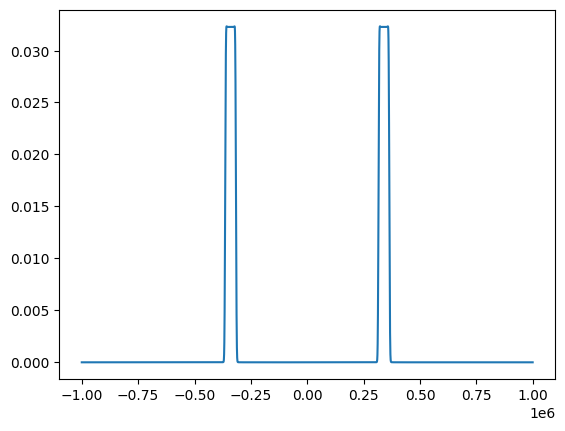

In [7]:
plt.plot(freqs, np.abs(BE_FFT))
# plt.xlim(310000,370000)

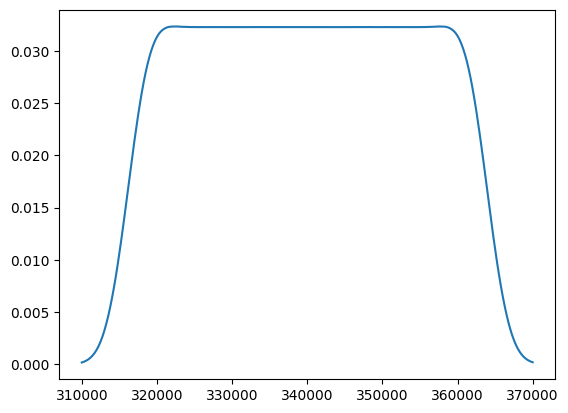

In [8]:
plt.plot(freqs[inds], np.abs(BE_FFT[inds]))

In [9]:
measurement = beparms.PXI.run()

DriverError: -1074126845: Maximum time exceeded before the operation completed.

Status Code: -200284

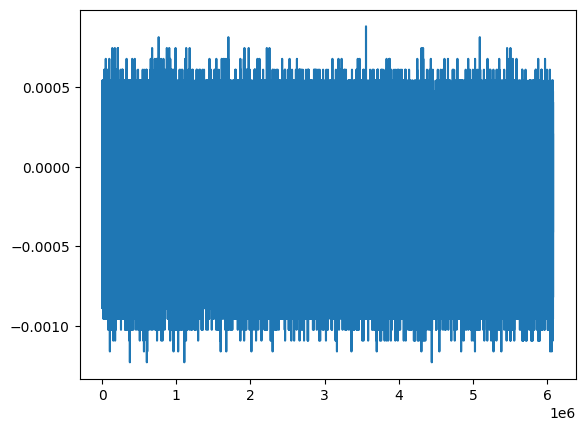

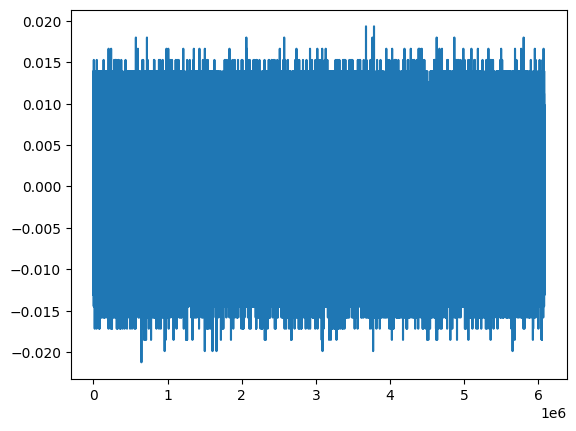

In [9]:

plt.plot(np.array(measurement[0].samples))
plt.figure()
plt.plot(np.array(measurement[1].samples))


TypeError: float() argument must be a string or a real number, not 'WaveformInfo'

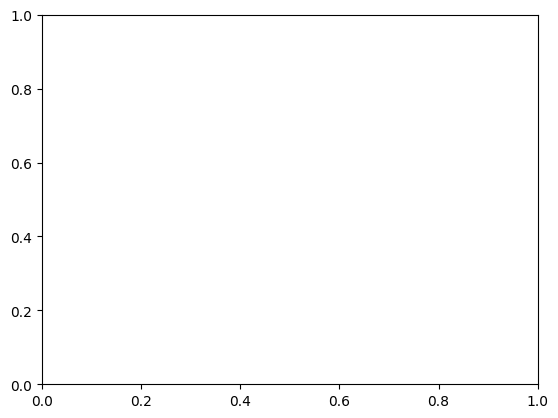

In [15]:
p = beparms.PXI.run()

plt.plot(np.array(p))
plt.show()

In [10]:
beparms.AI_sample_rate*beparms.BE_time

8000.0

# What is 'data' supposed to be??

In [11]:
data.shape

NameError: name 'data' is not defined

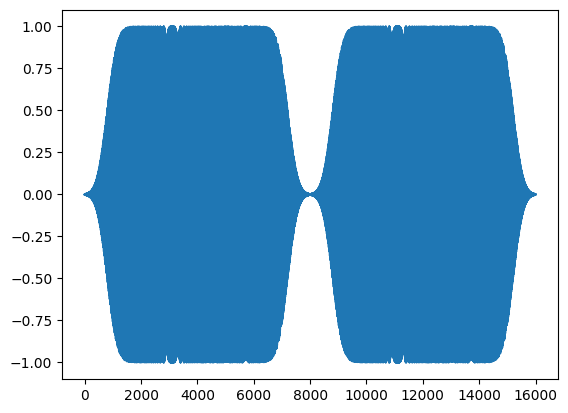

In [ ]:
plt.plot(beparms.get_simulated_BE_measurement())

In [ ]:
transfer_function = beparms.get_simulated_BE_measurement()[0:int(beparms.AI_sample_rate*beparms.BE_time)]

data = np.array(measurement[0].samples).reshape(-1,int(beparms.AI_sample_rate*beparms.BE_time))
BE_FFT = DataConverter.BE_FFT(data, transfer_function)

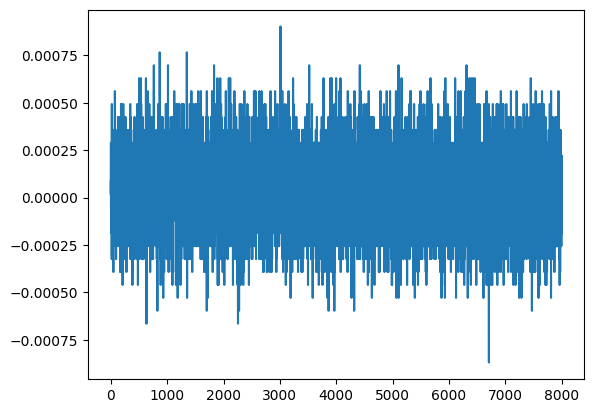

In [ ]:
plt.plot(data[0])

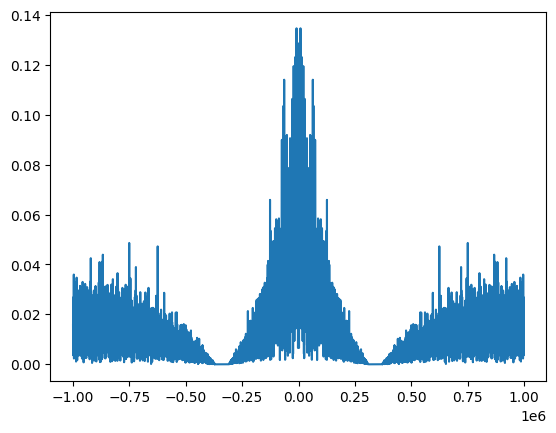

In [ ]:
plt.plot(freqs, np.abs(BE_FFT[0]))

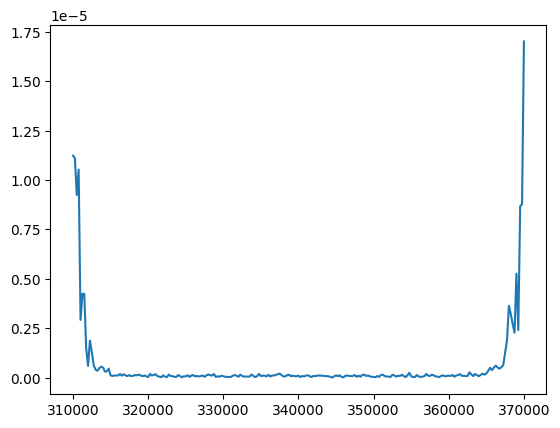

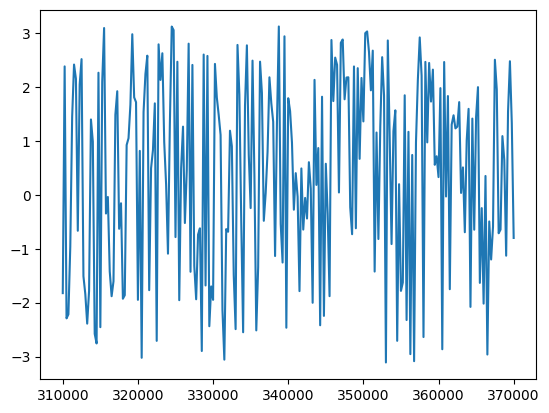

In [ ]:
plt.plot(freqs[inds], abs(BE_FFT[40,inds]))
plt.figure()
plt.plot(freqs[inds], np.angle(BE_FFT[40,inds]))

In [ ]:
BE_FFT[:,inds].shape

(760, 241)

In [ ]:
BE_FFT[:,inds][0][0]

(6.18922058266848e-06+5.565840185636466e-06j)

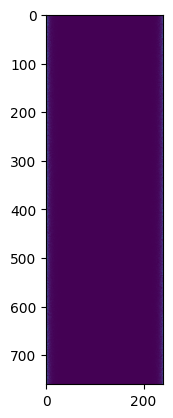

In [ ]:
plt.imshow(abs(BE_FFT[:,inds]))

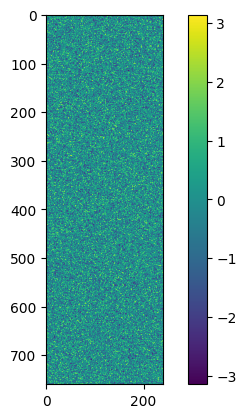

In [ ]:
plt.imshow(np.angle(BE_FFT[:,inds]))
plt.colorbar()

In [ ]:
import pyUSID as usid
import numpy as np
import sidpy
import h5py
import matplotlib.pyplot as plt

In [ ]:
file_path = 'testing_data.h5'
h5s_file = h5py.File(file_path, mode='w') #TODO: make this a with operation

In [ ]:
h5s_meas_group = sidpy.prov_utils.create_indexed_group(h5s_file, 'Measurement')
h5s_chan_group = sidpy.prov_utils.create_indexed_group(h5s_meas_group, 'Channel')
print(h5s_chan_group)

<HDF5 group "/Measurement_000/Channel_000" (0 members)>


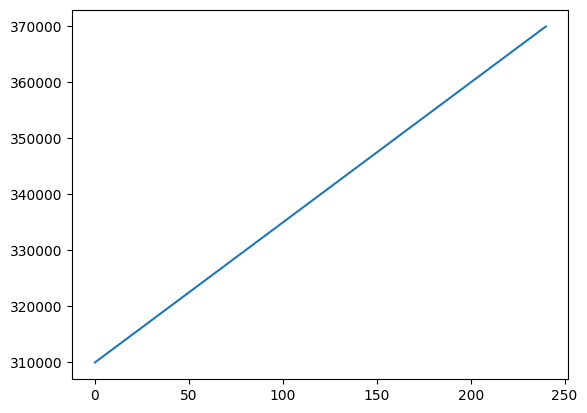

In [ ]:
plt.plot(freqs[inds])

In [ ]:
x = np.linspace(0, 60, 60)
y = np.linspace(0, 60, 60)
freqs_bin = freqs[inds] #TODO: create an object for this since we call it alot 
DC_voltage = beparms.be_spectroscopy.DC_waveform
field = np.arange(2 if beparms.spectroscopic_measurement_state == 'on and off' else 1)
cycle = np.arange(beparms.spectroscopic_cycles)


In [ ]:
pos_dims = [usid.Dimension('X', 'nm', x),# TODO: need to get these values from Yael's code
            usid.Dimension('Y', 'um', y)]
spec_dims = [usid.Dimension('Cycle', '', cycle),
             usid.Dimension('Field', '', field),
             usid.Dimension('DC_Offset', 'V', DC_voltage),
            usid.Dimension('Frequency', 'Hz', freqs_bin) 
             ]

In [ ]:
sidpy.hdf_utils.write_simple_attrs(h5s_meas_group, {'BE_actual_duration_[s](BE_time)': 0.004,
                                                'BE_amplitude_[V](BE_ampl)': 1,
                                                'BE_auto_smoothing(BE_smoothing = 125)': 'auto smoothing on',
                                                'BE_band_edge_smoothing_[s](False)' : 4832.1,
                                                'BE_band_edge_trim(False)' : 0.094742,
                                                'BE_band_width_[Hz](BE_bandwith)' : 200000,
                                                'BE_bins_per_band(False)' : 0,
                                                'BE_center_frequency_[Hz](center_freq)' : 1310000,
                                                'BE_desired_duration_[s](False)' : 0.004,
                                                'BE_phase_content(BE_wave_type)' : 'chirp-sinc hybrid',
                                                'BE_phase_variation(False)' : 1,
                                                'BE_points_per_BE_wave(BE_ppw)' : 0,
                                                'BE_repeats(BE_rep)' : 4,
                                                'FORC_V_high1_[V](False)' : 1,
                                                'FORC_V_high2_[V](False)' : 10,
                                                'FORC_V_low1_[V](False)' : -1,
                                                'FORC_V_low2_[V](False) ': -10,
                                                'FORC_num_of_FORC_cycles(False)' : 1,
                                                'FORC_num_of_FORC_repeats(False)' : 1,
                                                'File_MDAQ_version(False)' : 'MDAQ_VS_090915_01', 
                                                'File_date_and_time(False)' : '18-Sep-2015 18:32:14', 
                                                'File_file_name(False)' : 'SP128_NSO',
                                                'File_file_path(False)' : 'testing',
                                                'File_file_suffix(False)' : 99,
                                                'IO_AO_amplifier(False)' : 10,
                                                'IO_AO_range_[V](False)' : '+/- 10',
                                                'IO_Analog_Input_1(False)' : '+/- .1V, FFT', 
                                                'IO_Analog_Input_2(False)' : 'off', 
                                                'IO_Analog_Input_3(False)' : 'off',
                                                'IO_Analog_Input_4(False)' : 'off',
                                                'IO_DAQ_platform(AI_platform)' : 'NI 6115',
                                                'IO_rate_[Hz](False)' : 4000000,
                                                'VS_amplitude_[V](False)' : 16, 
                                                'VS_cycle_fraction(False)' : 'full',
                                                'VS_cycle_phase_shift(spectroscopic_phase_shift)' : 0,
                                                'VS_measure_in_field_loops(spectroscopic_measurement_state)' : 'in and out-of-field',
                                                'VS_mode(False)' : 'DC modulation mode',
                                                'VS_number_of_cycles(spectroscopic_cycles)' : 2,
                                                'VS_offset_[V](spectroscopic_offset)' : 0,
                                                'VS_read_voltage_[V](spectroscopic_start_voltage)' : 0,
                                                'VS_set_pulse_amplitude[V](False)' : 0,
                                                'VS_set_pulse_duration[s(False)]' : 0.002,
                                                'VS_step_edge_smoothing_[s](False)' : 0.001,
                                                'VS_steps_per_full_cycle(spectroscopic_points)' : 96,
                                                'data_type(False)' : 'BEPSData', 
                                                'grid_/single(False)' : 'grid',
                                                'grid_contact_set_point_[V](False)' : 1,
                                                'grid_current_col(False)' : 1,
                                                'grid_current_row(False)' : 1,
                                                'grid_cycle_time_[s](False)' : 10,
                                                'grid_measuring(False)' : 0,
                                                'grid_moving(False) ': 0,
                                                'grid_num_cols(x)' : 60,
                                                'grid_num_rows(y)' : 60,
                                                'grid_settle_time_[s](False)' : 0.15,
                                                'grid_time_remaining_[h;m;s](False)' : 10,
                                                'grid_total_time_[h;m;s](False)' : 10,
                                                'grid_transit_set_point_[V](False)' : 0.1,
                                                'grid_transit_time_[s]' : 0.15,
                                                'num_bins(BE_num_bins)' : 165,
                                                'num_pix(False)' : 3600,
                                                'num_udvs_steps(False)' : 384})

In [ ]:
h5_raw = usid.hdf_utils.write_main_dataset(h5s_chan_group,  # parent HDF5 group
                                           (len(x) * len(y), len(freqs_bin)*len(DC_voltage) * len(cycle)*len(field)),  # shape of Main dataset
                                           'Raw_Data',  # Name of main dataset
                                           'Current',  # Physical quantity contained in Main dataset
                                           'nA',  # Units for the physical quantity
                                           pos_dims,  # Position dimensions
                                           spec_dims,  # Spectroscopic dimensions
                                           dtype=np.complex_,  # data type / precision
                                           compression='gzip',
                                           main_dset_attrs={'IO_rate': 4E+6, 'Amplifier_Gain': 9})# TODO: extract all names need to convert to pycroscopy :( also include our naming conventions.
print(h5_raw)

c:\Users\Asylum User\anaconda3\envs\afm\Lib\site-packages\pyUSID\io\hdf_utils\simple.py:1072: UserWarning: In the future write_ind_val_dsets will default to requiring dimensions to be arranged from slowest to fastest varying
  warn('In the future write_ind_val_dsets will default to requiring dimensions to be arranged from slowest to fastest varying')
c:\Users\Asylum User\anaconda3\envs\afm\Lib\site-packages\pyUSID\io\hdf_utils\simple.py:1129: UserWarning: pyUSID.io.hdf_utils.simple.write_ind_val_dsets no longer createsregion references for each dimension. Please use pyUSID.io.reg_ref.write_region_references to manually create region references
  warn('pyUSID.io.hdf_utils.simple.write_ind_val_dsets no longer creates'


<HDF5 dataset "Raw_Data": shape (3600, 183160), type "<c16">
located at: 
	/Measurement_000/Channel_000/Raw_Data 
Data contains: 
	Current (nA) 
Data dimensions and original shape: 
Position Dimensions: 
	Y - size: 60 
	X - size: 60 
Spectroscopic Dimensions: 
	Frequency - size: 241 
	DC_Offset - size: 190 
	Field - size: 2 
	Cycle - size: 2
Data Type:
	complex128


### Julian commented out h5_raw.flush(). Now it works, but must use len() instead of .shape since h5_raw[0] is a numpy.ndarray

In [ ]:
pixel_index = 0

h5_raw[pixel_index] = BE_FFT[:,inds].reshape(-1)

#h5_raw.flush()

In [ ]:
len(h5_raw[0])

183160

In [ ]:
h5_raw[0].shape

ValueError: Invalid dataset identifier (invalid dataset identifier)

In [ ]:
BE_FFT[:,inds].reshape(-1)

array([ 6.18922058e-06+5.56584019e-06j,  2.02548699e-05-1.99480948e-06j,
       -1.01091016e-05-7.09016093e-07j, ...,
       -2.64805333e-06-4.96887554e-06j,  1.94735661e-05-3.37959326e-06j,
       -2.81294090e-06-1.30636982e-05j])

In [ ]:
iind = np.where(BE_FFT[:,inds].imag<0)
rind = np.where(BE_FFT[:,inds].real<0)

In [ ]:
test  = BE_FFT[:,inds]
test[iind] *=-1
test[rind] *=-1

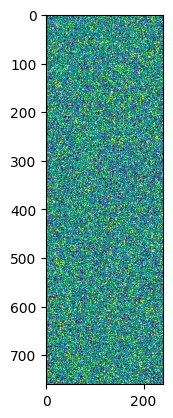

In [ ]:
plt.imshow(test ==BE_FFT[:,inds])

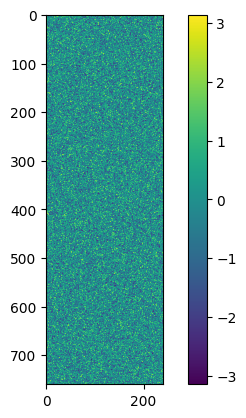

In [ ]:
plt.imshow(np.angle(test))
plt.colorbar()

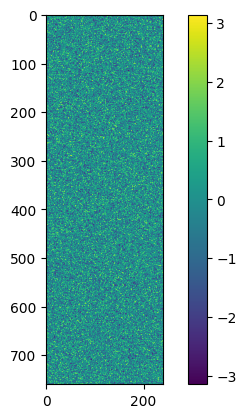

In [ ]:
plt.imshow(np.angle(BE_FFT[:,inds]))
plt.colorbar()

In [ ]:
BE_FFT[:,inds][0].shape

(241,)

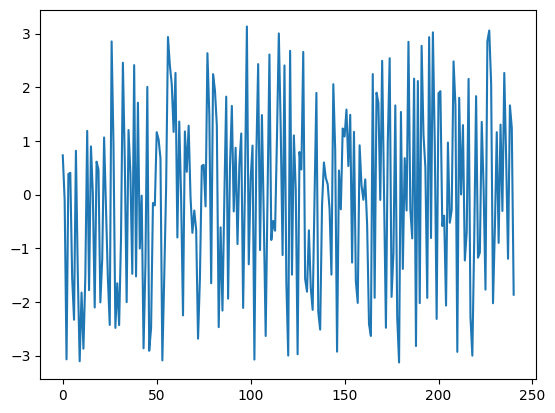

In [ ]:
plt.plot(np.angle(BE_FFT[:,inds][0]))

### what is the below code supposed it be?? Testing??

In [ ]:
plt.plot(np.arctan(tan))

NameError: name 'tan' is not defined

In [ ]:
tan = np.real(BE_FFT[:,inds][0])/np.imag(BE_FFT[:,inds][0])

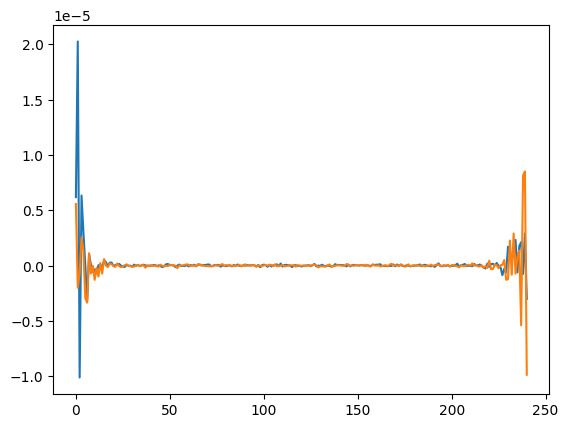

In [ ]:
plt.plot(np.real(BE_FFT[:,inds][0]))
plt.plot(np.imag(BE_FFT[:,inds][0]))

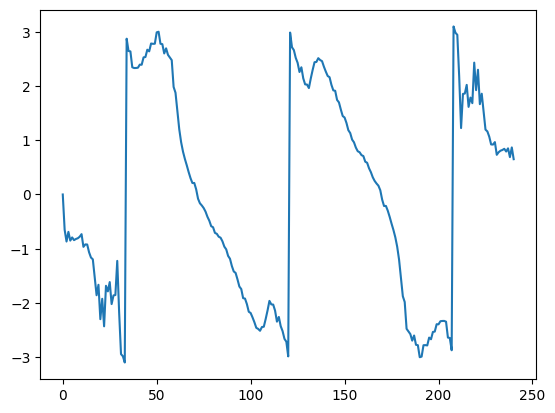

In [ ]:
tester = np.fft.ifft(np.imag(BE_FFT[:,inds][0,:]))/np.fft.ifft(np.real(BE_FFT[:,inds][0,:]))
plt.plot(np.angle(tester))

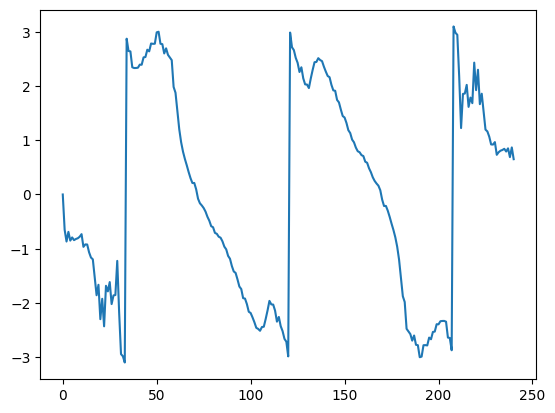

In [ ]:
tester = np.fft.ifft(np.imag(BE_FFT[:,inds][0,:]))/np.fft.ifft(np.real(BE_FFT[:,inds][0,:]))
plt.plot(np.angle(tester))

c:\Users\Asylum User\anaconda3\envs\afm\Lib\site-packages\matplotlib\cbook\__init__.py:1340: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


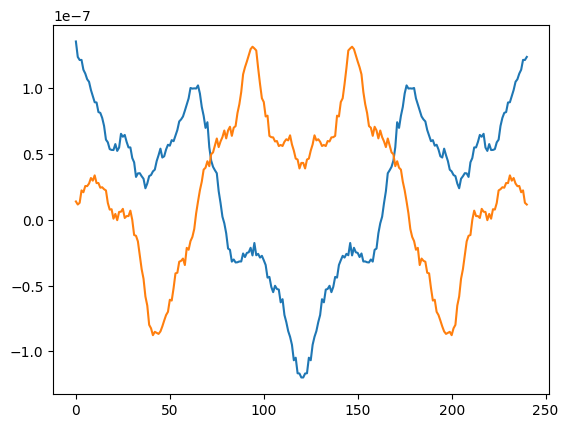

In [ ]:
plt.plot(np.fft.ifft(np.real(BE_FFT[:,inds][0,:])))
plt.plot(np.fft.ifft(np.imag(BE_FFT[:,inds][0,:])))
